In ICE4, you will learn: 

* how to use logistic regression to train a classifier. 

* how to use decision tree to train a classifier 

* how to use Naive Bayes tree to train a classifier.

* report model performance on a validation dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mooc = pd.read_csv("ICE4_Data.csv")
mooc

,certified,forum.posts,grade,assignment
0,no,7,3,9
1,no,7,4,1
2,yes,191,8,19
3,yes,130,10,18
4,yes,135,8,18
...,...,...,...,...
995,yes,88,10,13
996,yes,153,10,19
997,no,41,4,3
998,no,47,6,12


* Certified means whether the student earns the certification. 
* forum.posts means the number of posts the students have posted. 
* Assignment means how many optional assignment the students have complemented. 

In [3]:
mooc['certified'].value_counts()

yes    725
no     275
Name: certified, dtype: int64

In [4]:
mooc.describe()

,forum.posts,grade,assignment
count,1000.000000,1000.00000,1000.000000
mean,113.107000,7.76500,13.693000
std,55.126477,2.38232,5.011973
min,1.000000,1.00000,1.000000
25%,72.750000,8.00000,12.000000
50%,118.500000,8.00000,15.000000
75%,160.000000,9.00000,17.000000
max,200.000000,10.00000,20.000000


Instead of using pd.plotting.scatter_matrix() here, I use the seaborn package to plot a prettier graphic. You can tell the pairplot() function as a color code for certified variable. 

In [5]:
import seaborn as sns

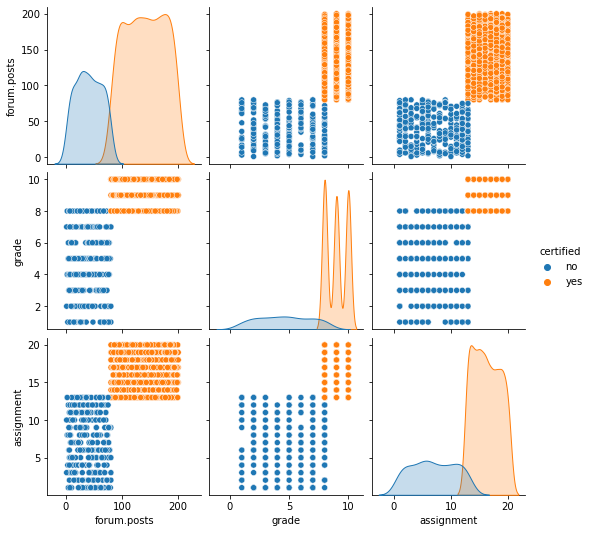

In [6]:
sns.pairplot(mooc, hue = "certified")

Before we start to build the logistic regression model, pause one sec, what do you see here from the above descriptives?

People who do work tend to have a certification. 

To build a logistic regression, we need to import LogisticRegression from the sklearn.linear_model

In [7]:
from sklearn.linear_model import LogisticRegression

Before we build a logistic regression, we need to create a dummy variable for ceritified. For here, we need to use pd.get_dummies() functions

In [8]:
dummy = pd.get_dummies(mooc['certified'], prefix = 'certified') # Here prefix will create a new colums name (certified_yes)

dummy

,certified_no,certified_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,1,0
998,1,0


We are going to need one column here, so we merge the two dataset and drop the useless columne "certified"

In [9]:
moocD = pd.concat([mooc,dummy],axis = 1)
moocD = moocD.drop(['certified', 'certified_no'], axis = 1)
moocD

,forum.posts,grade,assignment,certified_yes
0,7,3,9,0
1,7,4,1,0
2,191,8,19,1
3,130,10,18,1
4,135,8,18,1
...,...,...,...,...
995,88,10,13,1
996,153,10,19,1
997,41,4,3,0
998,47,6,12,0


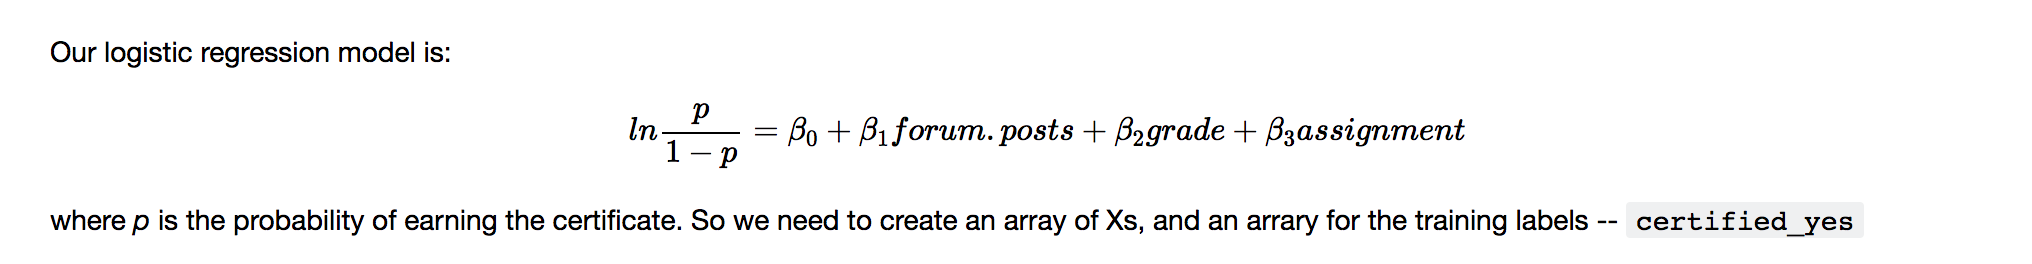

In [10]:
Xs = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified = moocD.loc[:,"certified_yes"].values.reshape(-1, 1)

Then loading LogisticRegression() and calling for LogisticRegression.fit() is very similar to what we have done in the previous ICE.

In [11]:
moocLogitModel1 = LogisticRegression()
moocLogitModel1.fit(Xs, certified)

/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

We can call for the intercept and coefficients of each parameter and we will have our logistic regression mode

In [12]:
moocLogitModel1.intercept_

array([-63.13291439])

In [13]:
moocLogitModel1.coef_

array([[0.62419697, 0.52270711, 0.85766257]])

If you want to see a nicer output, statsmodels.api proides an sm model, which does pretty much the same thing:

In [14]:
import statsmodels.api as sm

moocLogitModel2 = sm.Logit(certified, Xs)
moocLogitModel2Fit = moocLogitModel2.fit() 
print (moocLogitModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 22.457768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                     inf
Time:                        12:48:04   Log-Likelihood:                -22458.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0378      0.003     10.852      0.000       0.031       0.045
x2            -0.3202      0

/Users/mark/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/mark/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/mark/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


Decision Trees

Let's move on to decision tree. A Decision Tree is another supervised Machine learning algorithm. The decision tree is like a tree with nodes. The branches depend on a number of factors. It splits data into branches like these till it achieves a threshold value. A decision tree consists of the root nodes, children nodes, and leaf nodes.



The simplistic way of understanding decision tree would be a flow chart like this:

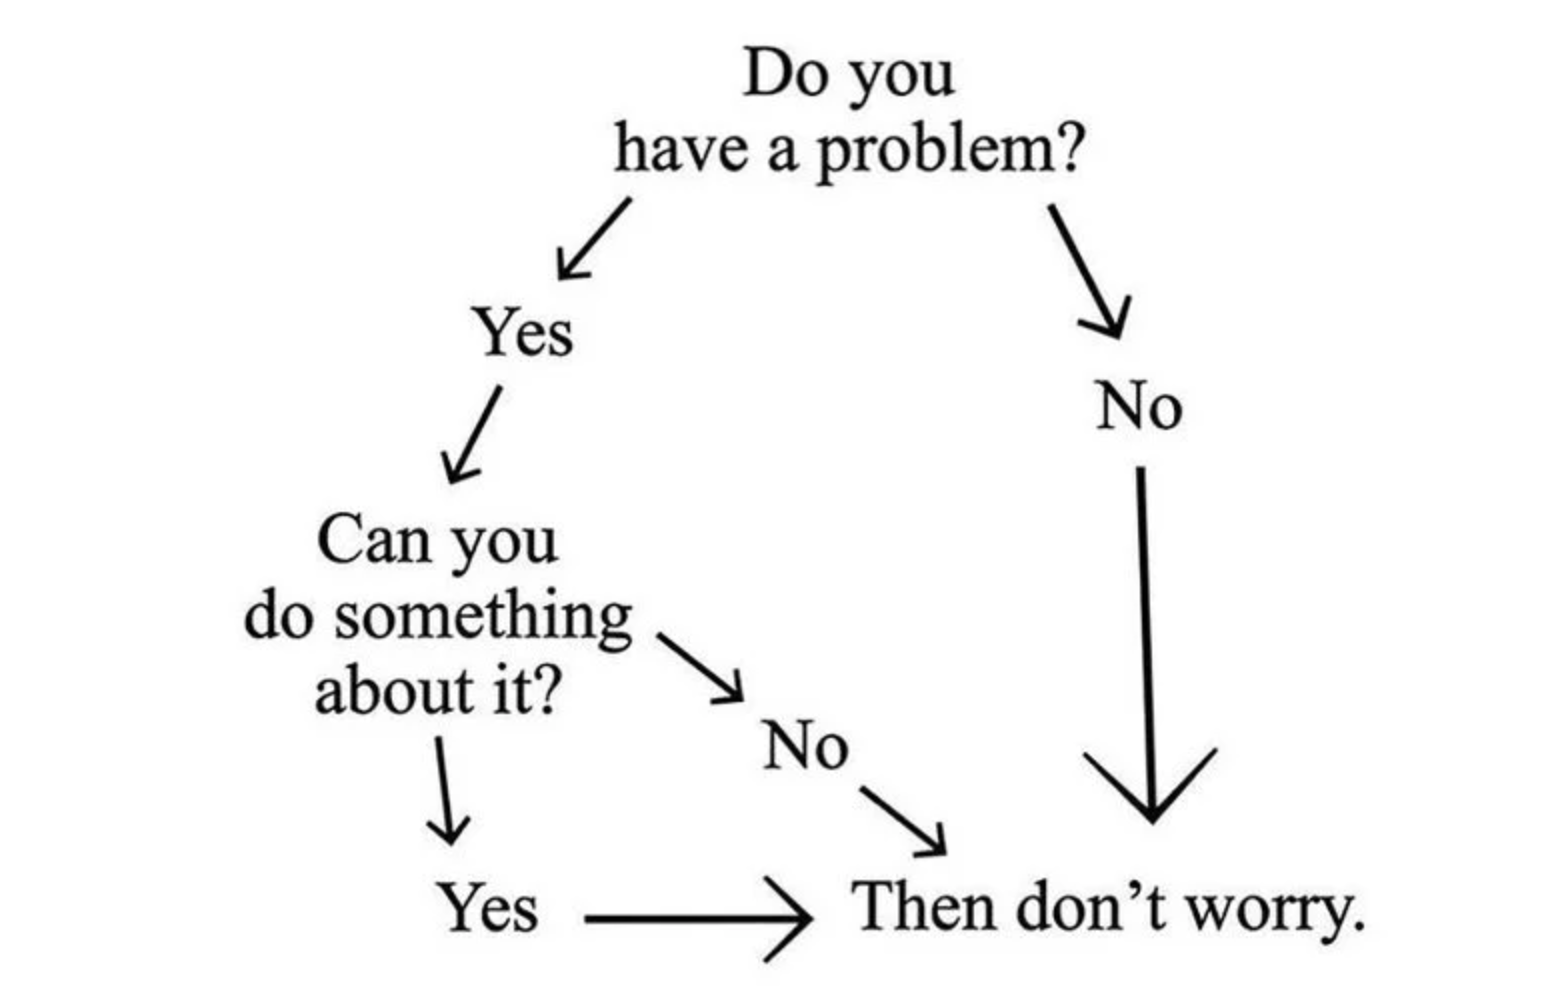

Decision trees learn from data to approximate the training data with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Decision tree has various algorithms to implement. In sklearn, an optimised version of CART algorithm is used.

Learn more about decision tree:

Decision tree has various algorithms to implement. In sklearn, an optimised version of CART algorithm is used.

Learn more about decision tree:

In [15]:
from sklearn.tree import DecisionTreeClassifier

Xs_tree = mooc.drop('certified', axis = 1)
certified = mooc['certified']

And similarly, initialize the classification tree model and then use the Xs and Y to train the model. Only two lines of code.

In [16]:
moocTreeModel = DecisionTreeClassifier()
a = moocTreeModel.fit(Xs_tree, certified)
a

DecisionTreeClassifier()

Once we have the model, we have different ways to see what do we get. First, the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file. You can check details about export_text in the sklearn documentation.



In [17]:
from sklearn import tree
text_representation = tree.export_text(moocTreeModel)
print(text_representation)

|--- feature_0 <= 79.50
|   |--- class: no
|--- feature_0 >  79.50
|   |--- feature_2 <= 11.00
|   |   |--- class: no
|   |--- feature_2 >  11.00
|   |   |--- class: yes



Or try a prettier way with plot_tree. This requires matplotlib. Make sure it is already loaded. It allows us to easily produce figure of the tree. The more information about plot_tree arguments are in the docs.

[Text(133.92000000000002, 181.2, 'forum.posts <= 79.5\ngini = 0.399\nsamples = 1000\nvalue = [275, 725]\nclass = no'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 271\nvalue = [271, 0]\nclass = no'),
 Text(200.88000000000002, 108.72, 'assignment <= 11.0\ngini = 0.011\nsamples = 729\nvalue = [4, 725]\nclass = no'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = no'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 725\nvalue = [0, 725]\nclass = no')]

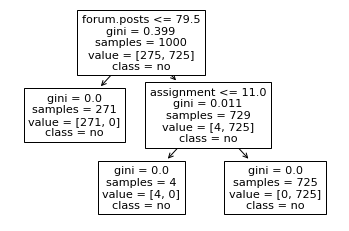

In [18]:
tree.plot_tree(moocTreeModel,
              feature_names = ["forum.posts", "grade", "assignment"], # This is optional. Just let the plot know the features name.
                class_names = mooc.certified # This is also optional. Read more information in the documentation.
              )

Naive Bayes 

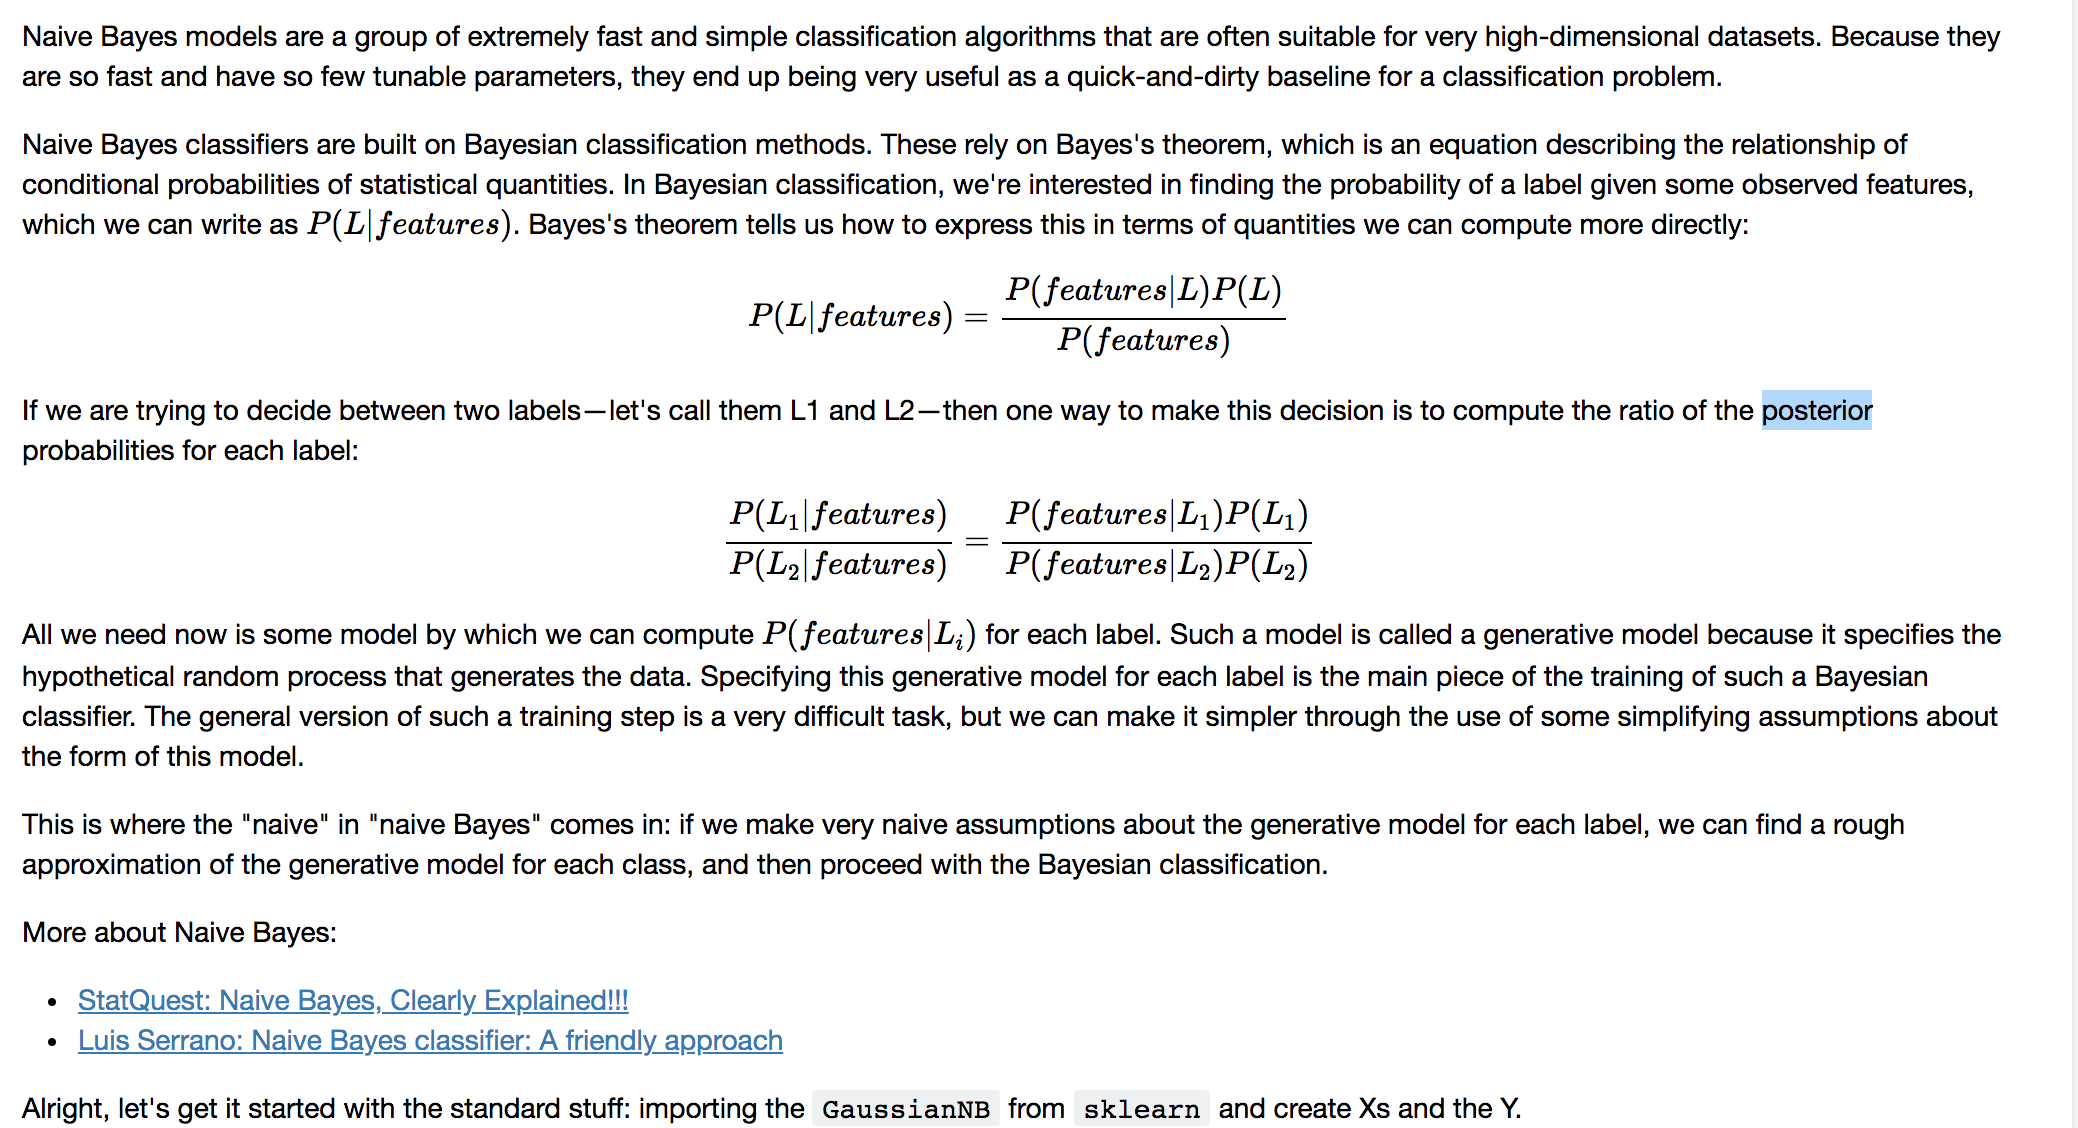

In [19]:
from sklearn.naive_bayes import GaussianNB

Xs_NB = mooc.drop('certified', axis = 1)
certified = mooc['certified']

Then, initialize the classification Naive Bayes model and then the same two lines of code.



In [20]:
moocNBModel = GaussianNB()
b = moocNBModel.fit(Xs_NB, certified)
b

GaussianNB()

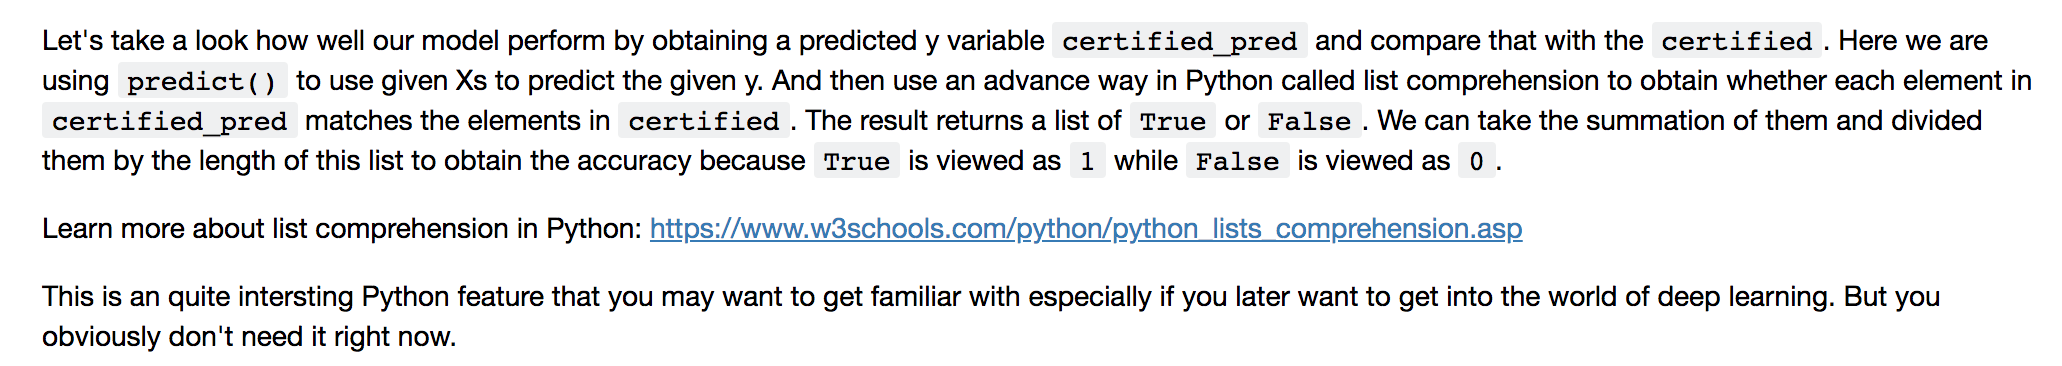

In [21]:
certified_pred = moocNBModel.predict(Xs_NB)
performance = [item in certified_pred for item in certified]
print('The accuracy is', sum(performance)/len(performance)*100, '%')

The accuracy is 100.0 %


Wait, what? Our accuracy is 100%. Is that too good to be true. Well... you shouldn't be surprised because of two reasons: (a) The data is very pretty as shown in the descriptives. This classification task is almost like a no-brainer. (b) We are using the Xs that we used to train the model to obtain the predicted value. So basically, the model has already seen them. That's cheating! How about we separate a group of data that the model has never seen and play a fair game?

Model Evaluation

As discussed previously, we need a sample of data held back from training your model that is used to give an estimate of model performance.

In the machine learning world, this type of data is often called either validation data or test data as opposed to the training data, which was used to train the model.

At the basic level, our model is pretty simple and straightfoward. So there is no point to differentiate the validation data and the test data. In 4050, we will probably use these terms somewhat interchangeably. But notice that they are different. Read more here: https://www.applause.com/blog/training-data-validation-data-vs-test-data

We will talk about some more details of model evaluation in the next couple weeks. But let me introduce you to a simplistic way of knowing the model performance -- confusion matrix.

It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

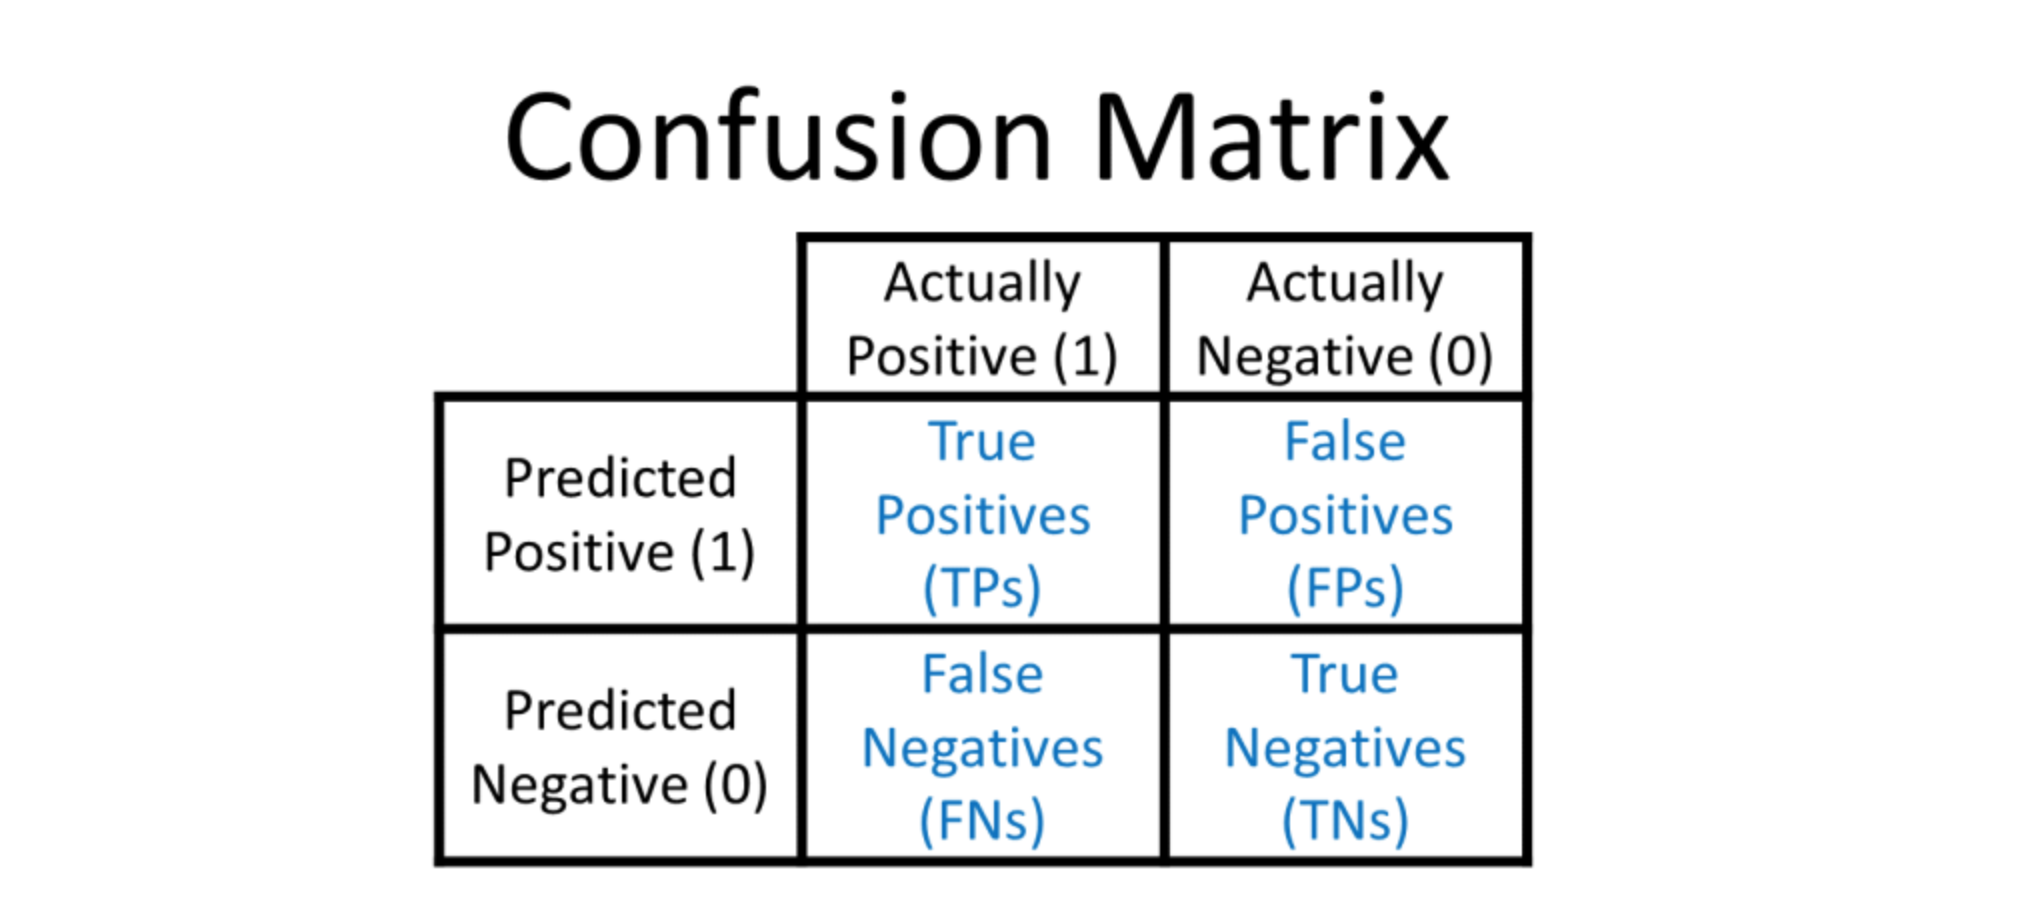

* True Positive: You predicted positive and it’s true. You predicted that a person has covid and he/she actually has.
* True Negative: Interpretation: You predicted negative and it’s true. You predicted that a person does not have covid and he/she actually does not have it.
* False Positive: (Type 1 Error) You predicted positive but it’s false. You predicted that a person has covid, but he/she actually does not have it.
* False Negative: (Type 2 Error) You predicted negative but it’s true. You predicted that a person does not have covid, but he/she actually has it.

Here are a couple of things we need to do:

* Split the data into two sets (by convention it is 80:20, but it can be other ratio -- either larger or smaller depending on how many data points you have).
* Re-train the models
* Feed the Xs in the testing dataset and obtain the predicted Ys.
* Compare the predicted Ys with what is actually in the testing dataset (the ground truth) and obtain the confusion matrix.
* Obtain the accuracy from the confusion matrix.

Step 1. Split data (we need to do things a little bit differently for logistic regression model and the decision tree or Naive Bayes model because the latter two can handle categorical data without requiring dummy coding.

In [22]:
from sklearn.model_selection import train_test_split
## For logistic regression
Xs_logit = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified_logit = moocD.loc[:,"certified_yes"].values.reshape(-1, 1)
xs_logit_training, xs_logit_test, y_logit_training, y_logit_test = train_test_split(Xs_logit, certified_logit, test_size = 0.2)

## For decision tree and Naive Bayes
Xs_TNB = mooc.drop('certified', axis = 1)
certified_TNB = mooc['certified']
xs_TNB_training, xs_TNB_test, y_TNB_training, y_TNB_test = train_test_split(Xs_TNB, certified_TNB, test_size = 0.2)

Step 2. Re-train the model with just the training data. By this time you should be able to build your own models. Give it a try.

In [23]:
testmoocLogitModel1 = LogisticRegression()
testmoocLogitModel1.fit(xs_logit_training, y_logit_training)

/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [24]:
trainmoocLogitModel2 = sm.Logit(y_logit_training, xs_logit_training)
trainmoocLogitModel2Fit = trainmoocLogitModel2.fit()
print(trainmoocLogitModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 17.224251
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                     inf
Time:                        12:48:04   Log-Likelihood:                -13779.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0345      0.004      9.243      0.000       0.027       0.042
x2            -0.2991      0

/Users/mark/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/mark/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/mark/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [25]:
trainmoocTreeModel = DecisionTreeClassifier()
trainmoocTreeModel.fit(xs_logit_training, y_logit_training)
train_text_representation = tree.export_text(trainmoocTreeModel)
print(text_representation)

|--- feature_0 <= 79.50
|   |--- class: no
|--- feature_0 >  79.50
|   |--- feature_2 <= 11.00
|   |   |--- class: no
|   |--- feature_2 >  11.00
|   |   |--- class: yes



In [26]:
trainmoocNBModel = GaussianNB()
trainmoocNBModel.fit(xs_logit_training, y_logit_training)
certified_pred_train = trainmoocNBModel.predict(xs_logit_training)
train_performance = [item in certified_pred_train for item in y_logit_training]
print('The accuracy is', sum(train_performance)/len(train_performance)*100, '%')

The accuracy is 100.0 %


/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Sep 3. Feed the Xs in the testing dataset and obtain the predicted Ys.

In [27]:
# Predicted value in sklearn logistic regression model
certified_pred_logit1 = moocLogitModel1.predict(xs_logit_test)
# Predicted value in statsmodels logistic regression model
## INSERT YOUR CODE HERE TO OBTAIN certified_pred_logit2
certified_pred_logit2 = moocLogitModel2Fit.predict(xs_logit_test)
# Predicted value in decision tree model
## INSERT YOUR CODE HERE TO OBTAIN certified_pred_tree
certified_pred_tree1 = a.predict(xs_TNB_test)
# Predicted value in naive bayes model
## INSERT YOUR CODE HERE TO OBTAIN certified_pred_tree
certified_pred_tree2 = b.predict(xs_TNB_test)

Note here, two logistic regression model used the same testing dataset and the decision tree and naive bayes model used the same testing dataset. That's why the confusion matrices look different.

Step 4. Compare the predicted Ys with what is actually in the testing dataset (the ground truth) and obtain the confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
# sklearn logistic regression model confusion matrix
print(confusion_matrix(y_logit_test, certified_pred_logit1))

[[ 62   0]
 [  0 138]]


In [30]:
# statsmodels logistic regression model confusion matrix
print(confusion_matrix(y_logit_test, certified_pred_logit2.round()))

[[ 27  35]
 [  0 138]]


In [31]:
# decision tree model confusion matrix
print(confusion_matrix(y_TNB_test, certified_pred_tree1))

[[ 48   0]
 [  0 152]]


In [32]:
# Naive Bayes confusion matrix
print(confusion_matrix(y_TNB_test, certified_pred_tree2))

[[ 47   1]
 [  0 152]]


Note here, two logistic regression model used the same testing dataset and the decision tree and naive bayes model used the same testing dataset. That's why the confusion matrices look different.

Step 5. Obtaining accuracy score

In [33]:
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(y_logit_test, certified_pred_logit1)
ac_logit2 = accuracy_score(y_logit_test, certified_pred_logit2.round())
ac_tree = accuracy_score(y_TNB_test, certified_pred_tree1)
ac_NB = accuracy_score(y_TNB_test, certified_pred_tree2)

print("The accuracy for logistic regression in sklearn is", ac_logit1*100, "%")
print("The accuracy for logistic regression in statsmodels is", ac_tree*100, "%")
print("The accuracy for decision tree", ac_tree*100, "%")
print("The accuracy for naive bayes", ac_NB*100, "%")


The accuracy for logistic regression in sklearn is 100.0 %
The accuracy for logistic regression in statsmodels is 100.0 %
The accuracy for decision tree 100.0 %
The accuracy for naive bayes 99.5 %


In [34]:
ac_logit2 = accuracy_score(y_logit_test, certified_pred_logit2.round())